# **STUDENT MARK PREDICTION PROJECT**
- 14dec2023


**Problem statement**

In [18]:
#import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
from sklearn.model_selection import train_test_split

In [2]:
#load dataset

In [3]:
path= r"/content/drive/MyDrive/MY DS PROJECT PRACTICEOCT 23/student mark/student_info.csv"

df=pd.read_csv(path)

In [4]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [5]:
df.tail()

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [7]:
df.shape


(200, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [9]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


# **2.EDA**

In [11]:
from scipy import stats

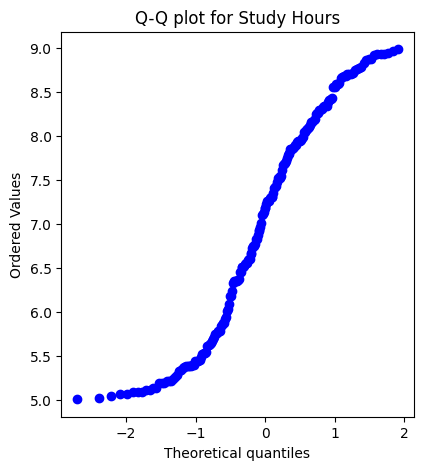

In [17]:
# Q-Q plot for study hours
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
stats.probplot(df['study_hours'], dist="norm", plot=plt,fit=True)


plt.title("Q-Q plot for Study Hours")
plt.show()

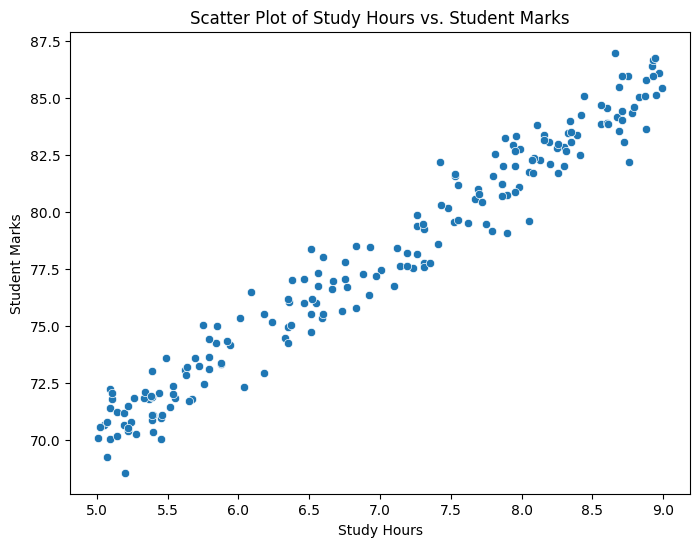

In [19]:
# SCATTERPLOT
plt.figure(figsize=(8, 6))
sns.scatterplot(x='study_hours', y='student_marks', data=df)
plt.title('Scatter Plot of Study Hours vs. Student Marks')
plt.xlabel('Study Hours')
plt.ylabel('Student Marks')
plt.show()

In [20]:
#LINEAR RELATIONSHIP

# **3.DATA PREPROCESSING**

In [21]:
#1. DATA CLEANING

In [23]:
df.isnull()

,study_hours,student_marks
0,False,False
1,False,False
2,True,False
3,False,False
4,False,False
...,...,...
195,False,False
196,False,False
197,False,False
198,False,False


In [25]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

study_hours      200
student_marks    200
dtype: int64

In [26]:
df.mean() # replace value with mean

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [27]:
df1=df.fillna(df.mean())

In [29]:
df1.isnull().sum() #no null values

study_hours      0
student_marks    0
dtype: int64

In [42]:
# split data depedent and indepedent varaibles y and x
X= df1[['study_hours']]
y= df1['student_marks']

In [43]:
X.shape

(200, 1)

In [44]:
y.shape

(200,)

In [45]:
 #split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 1)
(40, 1)
(160,)
(40,)


# **Model building**

In [47]:
# model build
#linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [48]:
lr= LinearRegression() #train lr
lr.fit(X_train, y_train)

LinearRegression()

In [76]:
# Make predictions on the test set
y_pred1 = lr.predict(X_test) # predict x test data

In [77]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred1)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.454097621248112


In [89]:
lr.score(X_test,y_test) # gives 94.25 %score it is good

0.942580760104548

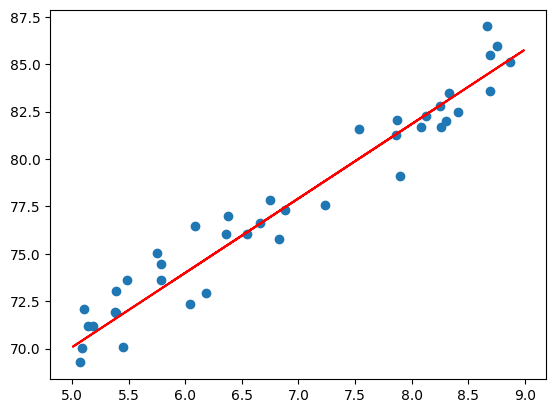

In [92]:
plt.scatter(X_test, y_test)
plt.plot(X_train, lr.predict(X_train), color='red')  # Corrected line
plt.show()


In [94]:
# predicted points near to line -good accuracy of LR MODEL

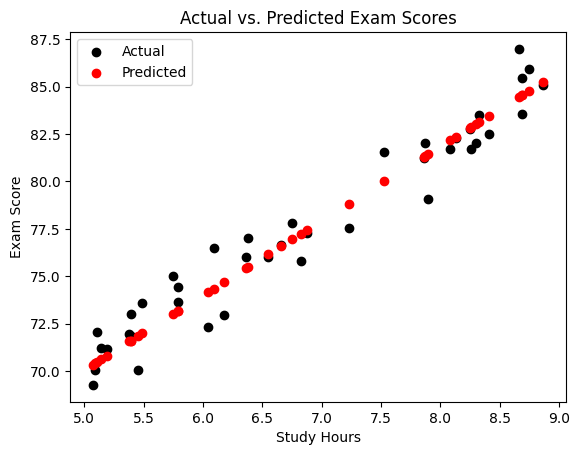

In [78]:
 #Visualize the predictions
plt.scatter(X_test['study_hours'], y_test, color='black', label='Actual')
plt.scatter(X_test['study_hours'], y_pred1, color='red', label='Predicted')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.legend()
plt.title('Actual vs. Predicted Exam Scores')
plt.show()

***there is a systematic pattern (e.g., all red points consistently above or below the black points), it might indicate bias in the predictions.***
- we have to align  red points align with black points, it suggests that the model captures the relationship between study hours and exam scores well.

In [57]:
# concanate x_test, y_test, y_pred to check
pd.DataFrame(np.c_[X_test,y_test,y_pred],columns=["Study_hours","student_marks_original","student_marks_pred"])

,Study_hours,student_marks_original,student_marks_pred
0,6.09,76.48,74.350168
1,6.55,76.03,76.156315
2,8.13,82.27,82.360038
3,7.53,81.57,80.004194
4,6.38,77.01,75.488826
5,5.79,74.44,73.172246
6,8.25,82.79,82.831207
7,5.19,71.18,70.816402
8,5.39,73.02,71.601683
9,6.18,72.96,74.703545


In [87]:
# not too changes in pred and original so we keep this model


*i want to use cross validation to improve model performance*

In [52]:
from sklearn.model_selection import cross_val_score

In [53]:
# Build a linear regression model
model = LinearRegression()

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')



In [54]:
# Convert negative MSE to positive
cv_scores = -cv_scores

# Print cross-validation scores
print("Cross-Validation Scores:")
print(cv_scores)

# Print average MSE
print(f"Average Mean Squared Error: {cv_scores.mean()}")

Cross-Validation Scores:
[1.06306093 1.2322969  1.07281956 0.83240484 0.95436928]
Average Mean Squared Error: 1.0309903030459462


In [ ]:
#Each cv score represents the performance of the model on a different subset of the data.

**Conclusion**
- The cross-validation process helps assess how well the model generalizes to new, unseen data.
A lower average MSE and lower individual cross-validation scores suggest better predictive performance.
The variation in cross-validation scores across folds gives insights into the stability of your model.

***ABOVE MODEL IS GOOD FOR UNSEEN DATA***
- IF YOU WEANT TO IMPROVE MODEL PERFORMANCE SHOULD USE
- Cross-Validation and Hyperparameter Tuning:
- Regularization:

- Apply regularization techniques such as L1 (Lasso) or L2 (Ridge) regularization. Regularization can help prevent overfitting and improve the model's generalization.

**Using cross validation with hyper tunig - those model supprts hyperparater**

In [60]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge

In [62]:
# ridegemodel support hyperparameter

#cross validation
model_cv = Ridge()

cv_scores = cross_val_score(model_cv, X, y, cv=5, scoring='neg_mean_squared_error') #5 folds
cv_mse = -cv_scores.mean()
print(f"Cross-Validation Mean Squared Error: {cv_mse}")


Cross-Validation Mean Squared Error: 1.031918123740119


In [63]:
# Hyperparameter Tuning
param_grid = {'alpha': [0.1, 1, 10, 100]}
model_tune = Ridge()
grid_search = GridSearchCV(model_tune, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']
print(f"Best Alpha: {best_alpha}")

# Refit Model with Best Hyperparameters
best_model = Ridge(alpha=best_alpha)
best_model.fit(X_train, y_train)

# Evaluate the Improved Model
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error with Tuned Model: {mse}')

Best Alpha: 0.1
Mean Squared Error with Tuned Model: 1.4533337800715755


***Again  iwant to do scaling then model building lets see results***

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
# Build a linear regression model on scaled features
model3 = LinearRegression()
model3.fit(X_train_scaled, y_train)


LinearRegression()

In [67]:
# Make predictions on the scaled test set
y_pred = model3.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error with Scaling: {mse}')

Mean Squared Error with Scaling: 1.4540976212481111


In [ ]:
# no change in MSE
#

- **Use RF MODEL**

In [70]:
from sklearn.ensemble import RandomForestRegressor

In [71]:
#build a Random Forest regression model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [73]:
# Make predictions on the test set
y_pred_rf = model_rf.predict(X_test)

In [74]:
# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error with Random Forest: {mse_rf}')

Mean Squared Error with Random Forest: 2.180422629708859


**MSE NOT IMPROVED SO I SELECT LINEAR REGRESSION MODEL-lr**

**Analyzing residuals is a useful technique to identify patterns or areas where your model might be lacking. Here are steps for evaluating residuals and potential solutions:**

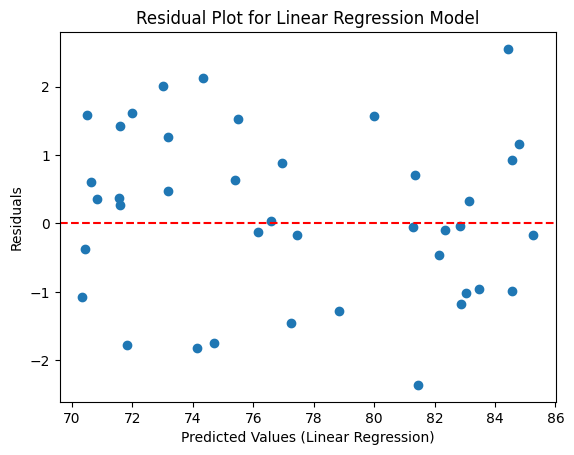

In [75]:
#Residual analysis on lr using scatter plot
residuals_lr = y_test - y_pred

# Residual plot
plt.scatter(y_pred, residuals_lr)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values (Linear Regression)')
plt.ylabel('Residuals')
plt.title('Residual Plot for Linear Regression Model')
plt.show()

In [79]:
#Residual ananlysis using distributution using histogram and qq plot check normality of residual errors
#

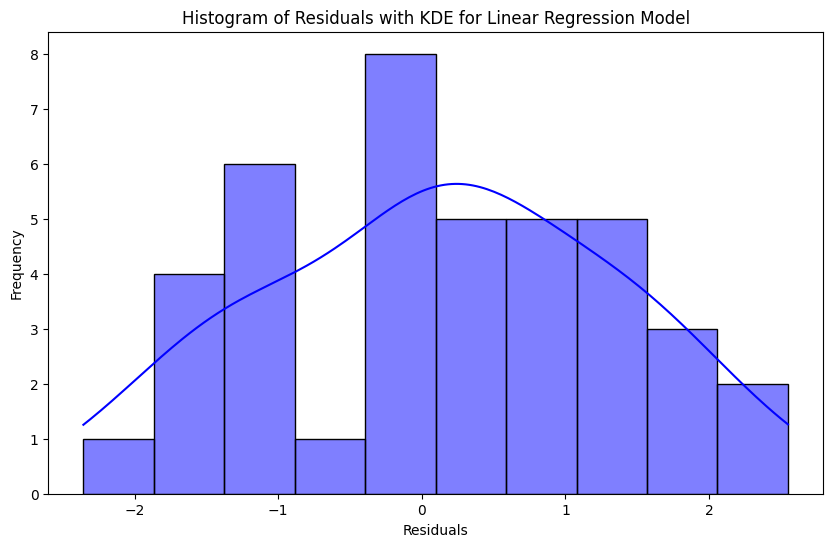

In [86]:
# Histogram of Residuals with KDE
plt.figure(figsize=(10, 6))
sns.histplot(residuals_lr, bins=10, kde=True, color='blue', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals with KDE for Linear Regression Model')
plt.show()

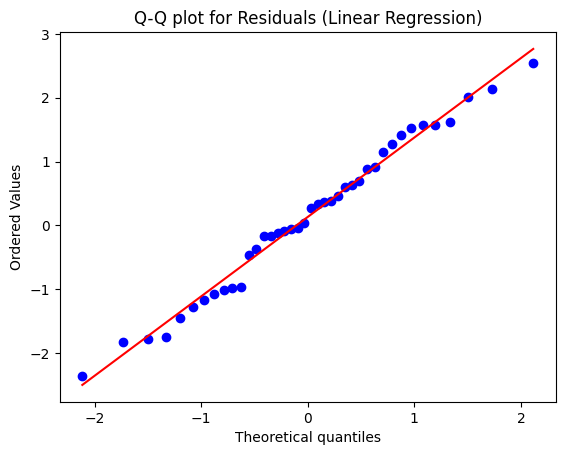

In [82]:
# Q-Q plot for Residuals
stats.probplot(residuals_lr, dist="norm", plot=plt)
plt.title("Q-Q plot for Residuals (Linear Regression)")
plt.show()

- *By examining the histogram and Q-Q plot, you can assess whether the residuals of the linear regression model are approximately normally distributed. If the residuals deviate significantly from normality, it might indicate that the model assumptions are not fully met,*

**not fully normally distributed but Linear regression model gives you better performance**